In [2]:
%pip install kagglehub

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/51.9 kB ? eta -:--:--
   ---------------------------------------- 51.9/51.9 kB ? eta 0:00:00
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ---------------------------------------- 0.0/164.9 kB ? eta -:--:--
   --------- ----------------------------- 41.0/164.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 164.9/164.9 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/102.8 kB ? eta -:--:--
   ---------------------------------------- 102.8/102.8 kB 5.8 MB/s eta 0:00:00
Using cached idna-3.10-py3-none-any.whl (70 kB)
   ---------------------------------------- 0.0/128.4 kB ? eta -:--:--
   ---------------------------------------- 128.4/128.4 kB 7.4 MB/s 


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("anushonkar/network-anamoly-detection")

# print("Path to dataset files:", path)

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [36]:
col = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\ML_Projects\NetworkAnamoly\dataset\versions\1\Train.txt', sep = ',',names = col)

In [37]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [38]:
df.shape

(125973, 43)

In [39]:
df.select_dtypes(exclude=[np.number])


,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [40]:
df.describe

<bound method NDFrame.describe of         duration protocoltype   service flag  srcbytes  dstbytes  land  \
0              0          tcp  ftp_data   SF       491         0     0   
1              0          udp     other   SF       146         0     0   
2              0          tcp   private   S0         0         0     0   
3              0          tcp      http   SF       232      8153     0   
4              0          tcp      http   SF       199       420     0   
...          ...          ...       ...  ...       ...       ...   ...   
125968         0          tcp   private   S0         0         0     0   
125969         8          udp   private   SF       105       145     0   
125970         0          tcp      smtp   SF      2231       384     0   
125971         0          tcp    klogin   S0         0         0     0   
125972         0          tcp  ftp_data   SF       151         0     0   

        wrongfragment  urgent  hot  ...  dsthostsamesrvrate  \
0             

In [41]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)


In [42]:
df.shape

(125973, 39)

In [43]:
df.isna().sum()


duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [45]:
le=LabelEncoder()
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

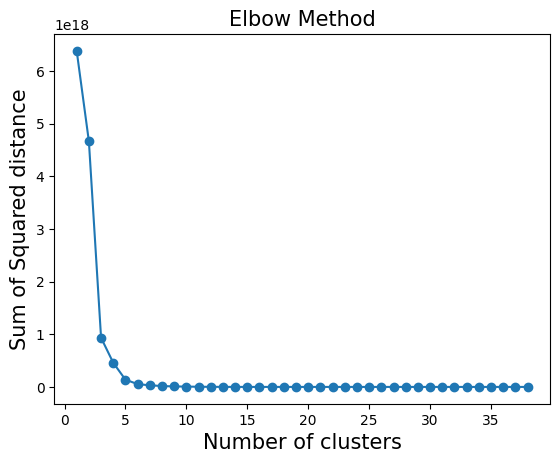

In [46]:
a=[]
K=range(1,39)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [47]:
kmeans = KMeans(n_clusters = 5,random_state = 111)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=111)

In [48]:
pd.Series(kmeans.labels_).value_counts()


0    125965
3         3
1         2
4         2
2         1
Name: count, dtype: int64

In [49]:
df['cluster_label'] = kmeans.fit_predict(df)


In [50]:
df[df['cluster_label'] != 0]


,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,cluster_label
1038,35682,1,60,3,381709090,0,0,0,0,0,...,0.12,0.08,0.0,0.00,0.00,0.08,0.50,15,9,3
43486,38259,1,10,3,621568663,0,0,0,0,0,...,0.08,0.03,0.0,0.00,0.00,0.03,1.00,15,11,3
44527,34578,1,49,3,1167519497,0,0,0,0,0,...,0.12,0.10,0.0,0.00,0.00,0.10,1.00,15,12,1
60570,2,1,18,2,693375640,0,0,1,0,0,...,0.09,0.22,0.0,0.18,0.67,0.05,0.33,15,17,3
62233,10999,1,44,4,0,1309937401,0,0,0,0,...,0.65,1.00,0.0,0.00,0.00,1.00,1.00,15,10,2
71629,39930,1,49,4,0,400291060,0,0,0,0,...,0.50,1.00,0.0,0.00,0.00,1.00,1.00,15,10,4
95029,39869,1,49,4,0,400291060,0,0,0,0,...,0.50,1.00,0.0,0.00,0.00,1.00,1.00,15,10,4
125429,36071,1,19,3,1379963888,0,0,0,0,0,...,0.12,0.06,0.0,0.00,0.00,0.06,1.00,15,11,1


In [51]:
metrics.silhouette_score(df, kmeans.labels_)


np.float64(0.999903067649602)